In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#loading csv file
data = pd.read_excel('Historical_data.xlsx')

In [3]:
data.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [4]:
data.drop('customer_id',axis=1,inplace=True)

In [5]:
data.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


&nbsp;

### Exploratatory data analysis.

<AxesSubplot:>

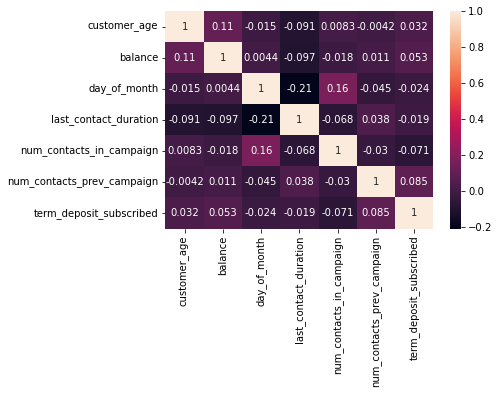

In [6]:
sns.heatmap(data.corr(),annot=True)

- There is no significant correlation between columns.

In [7]:
data.describe(percentiles=[0.75,0.80,0.85,0.90,0.95])

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
80%,50.000000,1847.000000,24.000000,900.000000,4.000000,0.000000,0.000000
85%,53.000000,2533.700000,27.000000,916.000000,4.000000,1.000000,0.000000
90%,55.000000,3620.800000,28.000000,935.000000,5.000000,2.000000,1.000000
95%,59.000000,5781.800000,29.000000,991.000000,8.000000,3.000000,1.000000


- __Almost 85% people are there who don't subscribe to term deposit.__

- __Positively skewed columns(mean > median).__
  - Customer age.
  - Balance.
  - Num contacts in campaign.
  - Num contacts prev campaign.

- __Negatively skewes columns(mean < median).__
   - Last contact duration.


&nbsp;

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                23403 non-null  float64
 1   job_type                    23880 non-null  object 
 2   marital                     23773 non-null  object 
 3   education                   23880 non-null  object 
 4   default                     23880 non-null  object 
 5   balance                     23603 non-null  float64
 6   housing_loan                23880 non-null  object 
 7   personal_loan               23767 non-null  object 
 8   communication_type          23880 non-null  object 
 9   day_of_month                23880 non-null  int64  
 10  month                       23880 non-null  object 
 11  last_contact_duration       23880 non-null  int64  
 12  num_contacts_in_campaign    23784 non-null  float64
 13  num_contacts_prev_campaign  238

In [9]:
data.isnull().sum()

customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

__Prensence of null values in the columns__
- customer_age.
- marital.
- balance.
- personal_loan.
- num_contacts in campaign.

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

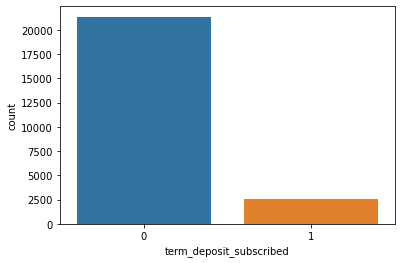

In [10]:
sns.countplot(x='term_deposit_subscribed', data = data)

- 0 is the majority class and there are very less no. of people who subscribed to term deposit.

In [11]:
#only categorical columns
categorical=[i for i in data.columns if data[i].dtype=='O']

In [12]:
categorical

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [13]:
# taking value counts on each categorical columns.
for i in categorical:
    print(i)
    print()
    print('the values are:') 
    print(data[i].value_counts())
    print()
    print()

job_type

the values are:
blue-collar      5167
management       5006
technician       3978
admin.           2717
services         2224
retired          1176
self-employed     845
entrepreneur      773
unemployed        675
housemaid         663
student           502
unknown           154
Name: job_type, dtype: int64


marital

the values are:
married     14271
single       6707
divorced     2795
Name: marital, dtype: int64


education

the values are:
secondary    12330
tertiary      6993
primary       3571
unknown        986
Name: education, dtype: int64


default

the values are:
no     23452
yes      428
Name: default, dtype: int64


housing_loan

the values are:
yes    13369
no     10511
Name: housing_loan, dtype: int64


personal_loan

the values are:
no     20001
yes     3766
Name: personal_loan, dtype: int64


communication_type

the values are:
cellular     15486
unknown       6892
telephone     1502
Name: communication_type, dtype: int64


month

the values are:
may    7331
j

- Everything looks good. Every unique value are valid and there are no such type of word which mean the same.

#### Univariate Analysis.

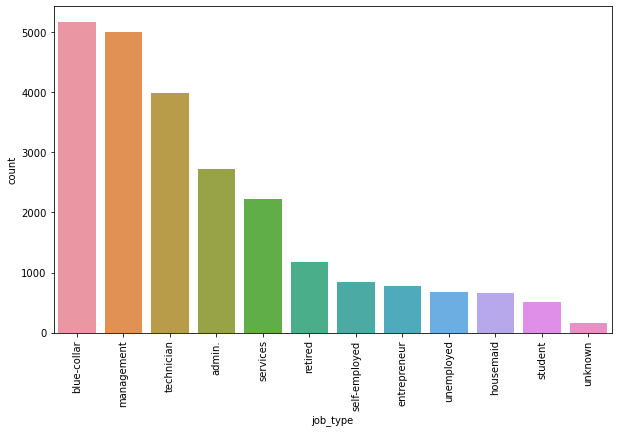

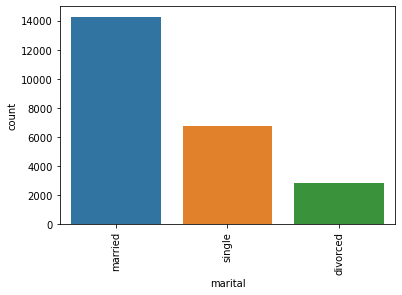

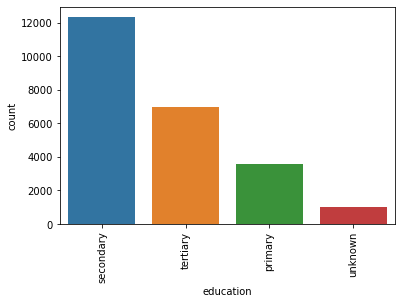

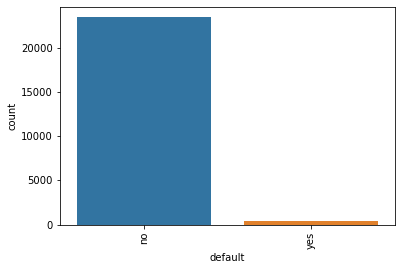

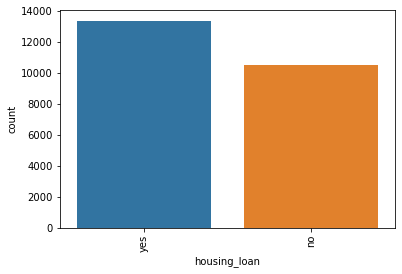

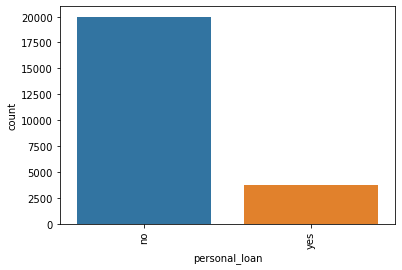

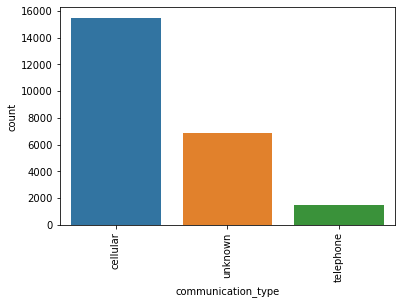

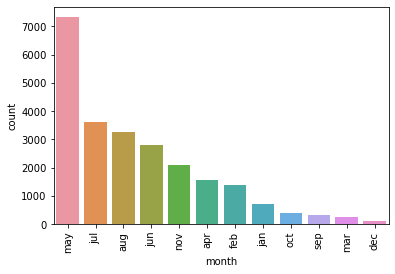

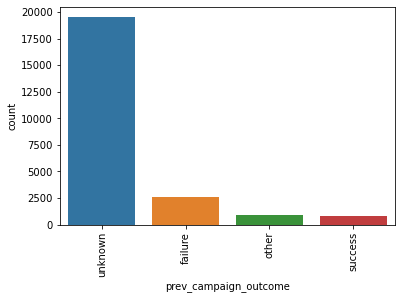

In [14]:
plt.figure(figsize=(10,6))
for i in categorical:
    sns.countplot(x=i,data=data,order=data[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

- Most people work as blue collar followed by management.
- married people are more followed by single
- most people studied till secondary followed by tertiary.
- __Almost 59% people have housing loan.__
- only 15.7% people have personal loan.
- in previous campaign outcome - data is unavilable for 81.7% people, 10.9% people are those <br> who are contacted by team but they refused to opt for term deposit and only 3% people opt for term deposit out of 23880 people.


In [15]:
813/23880

0.034045226130653264

In [16]:
data['prev_campaign_outcome'].value_counts()

unknown    19513
failure     2613
other        941
success      813
Name: prev_campaign_outcome, dtype: int64

#### Bivariate analysis.

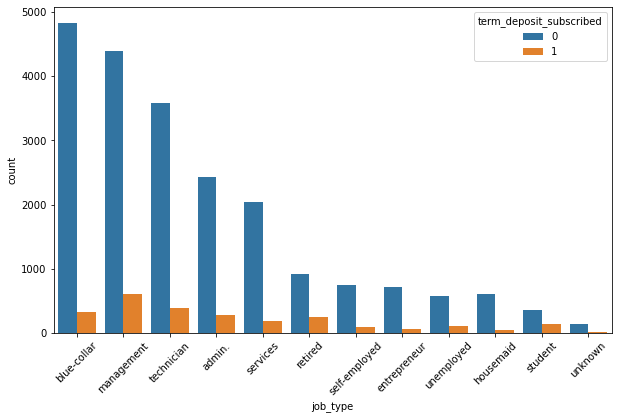

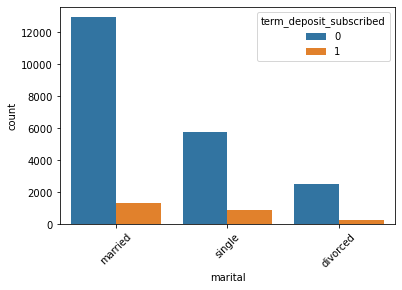

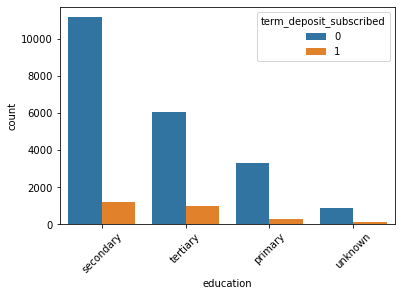

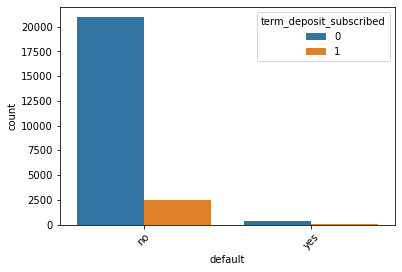

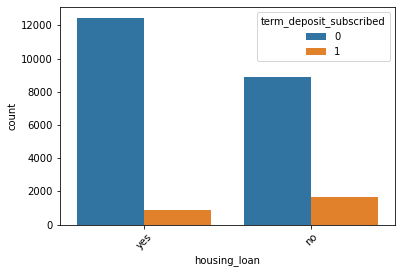

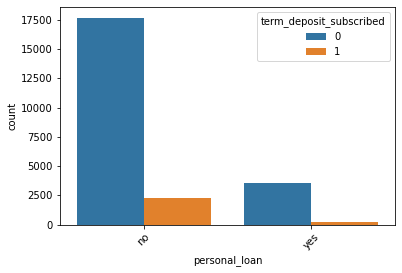

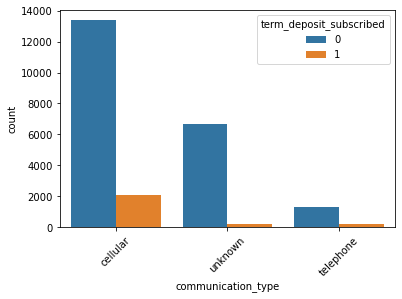

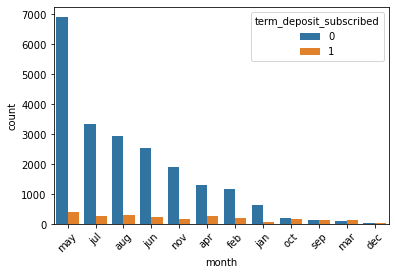

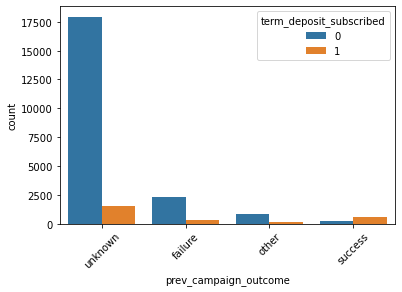

In [17]:
# Realtionship bwtween term deposit and categorical columns.
plt.figure(figsize=(10,6))
for i in categorical:
    sns.countplot(x=i ,data=data,hue='term_deposit_subscribed',order=data[i].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

- Person who dont posses any loan and subscribed to term deposit are more in number as compared to person with loan and subscribed to term deposit.

# seperate independent and dependent feature.
   

In [18]:
y = data[['term_deposit_subscribed']]

In [19]:
x = data.drop(['term_deposit_subscribed'],axis = 1)

In [20]:
x.shape

(23880, 15)

In [21]:
y.shape

(23880, 1)

#### To keep test data as unbiased as possible we seperate it into train and test data now.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=101)

In [24]:
# calculating percentage of missing values.
missing = x_train.isnull().sum().sort_values(ascending = False)
miss_per = (missing /len(x_train))*100

In [25]:
pd.DataFrame({'missing record':missing,'Percentage of missing record':miss_per.values})

,missing record,Percentage of missing record
customer_age,317,1.896387
balance,196,1.172529
marital,85,0.508495
personal_loan,83,0.496530
num_contacts_in_campaign,75,0.448672
job_type,0,0.000000
education,0,0.000000
default,0,0.000000
housing_loan,0,0.000000
communication_type,0,0.000000


<AxesSubplot:>

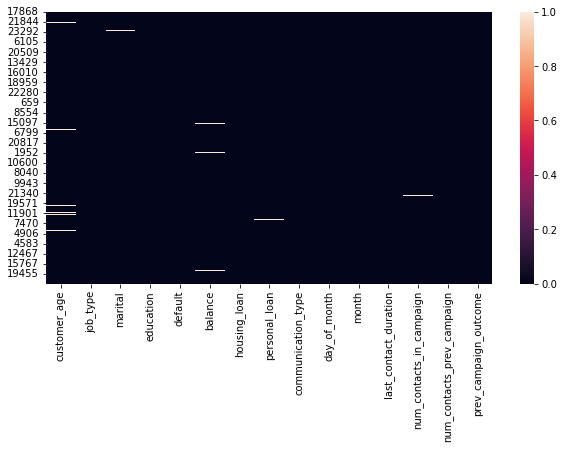

In [26]:
# Graphical representation of missing values.
plt.figure(figsize =(10,5))
sns.heatmap(x_train.isnull())

__Four columns having missing values.__
 - Customer_age
 - Marital
 - Balance
 - Personal_loan
 - Num_contacts_in_campaign   

&nbsp;

# Treating Null value 

- imputing missing values in Customer age column on the basis of their job type.

<AxesSubplot:xlabel='job_type', ylabel='customer_age'>

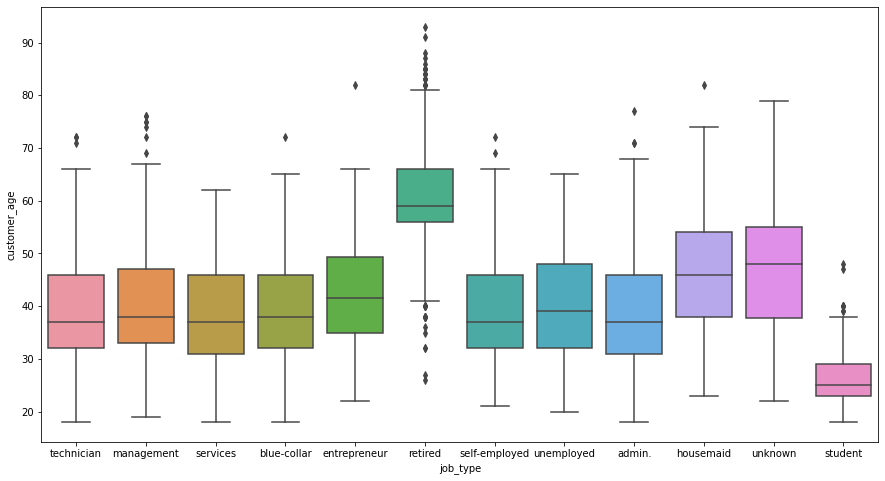

In [27]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'job_type', y = 'customer_age', data = x_train)

In [28]:
# Function for imputing missing value in age column based on job type column.
def age(cols):
    age = cols[0]
    jobtype = cols[1]
    
    if pd.isnull(age):
        
        if jobtype  in ['blue-collar','management','technician','service']:
            return 38
        elif jobtype == 'retired':
            return 60
        elif jobtype == 'enterpreneur':
            return 40
        elif jobtype == 'admin':
            return 36
        elif jobtype == 'student':
            return 25
        elif jobtype in ['housesmaid','unknown']:
            return 45
        else :
            return 38
    
    else:
        return age 

In [29]:
#Applying age function.
x_train['customer_age'] = x_train[['customer_age','job_type']].apply(age,axis = 1)

<AxesSubplot:>

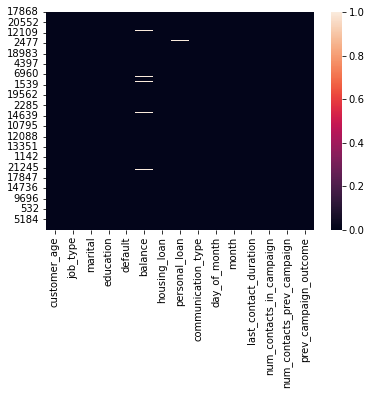

In [30]:
sns.heatmap(x_train.isnull())

In [31]:
# Function for getting total no. of missing rows.
def missing_row(df):
    indx = [ind  for ind,row in df.iterrows() if row.isnull().any()]
    print('There are total {} missing rows. i.e {}'.format(len(indx),(len(indx)/len(df))*100))
    return indx

In [32]:
indexes = missing_row(x_train) #This will give the list of index of rows which are missing.

There are total 436 missing rows. i.e 2.608279492701603


&nbsp;

__Droping remaining null values as only 2.52% rows are missing.__

In [33]:
x_train = x_train.dropna()
x_train = x_train.reset_index(drop = True)
y_train = y_train.drop(indexes)
y_train = y_train.reset_index(drop = True)

In [34]:
x_train.head(200)

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,34.0,technician,single,secondary,no,261.0,yes,yes,cellular,2,feb,993,1.0,1,failure
1,45.0,technician,divorced,secondary,no,4134.0,yes,no,unknown,14,may,892,8.0,0,unknown
2,35.0,management,single,secondary,no,3168.0,yes,no,unknown,30,may,876,1.0,0,unknown
3,47.0,technician,divorced,secondary,no,0.0,no,no,telephone,14,aug,800,8.0,0,unknown
4,38.0,services,married,secondary,no,2035.0,yes,no,cellular,12,may,894,6.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,32.0,admin.,single,secondary,no,219.0,yes,yes,cellular,18,may,888,6.0,0,unknown
196,46.0,services,married,secondary,no,29.0,no,yes,unknown,25,jun,850,2.0,0,unknown
197,53.0,blue-collar,married,primary,no,116.0,no,yes,cellular,24,jul,821,2.0,0,unknown
198,54.0,management,married,tertiary,no,6883.0,no,no,cellular,8,aug,806,2.0,0,unknown


In [35]:
y_train.head(200)

,term_deposit_subscribed
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,0


<AxesSubplot:>

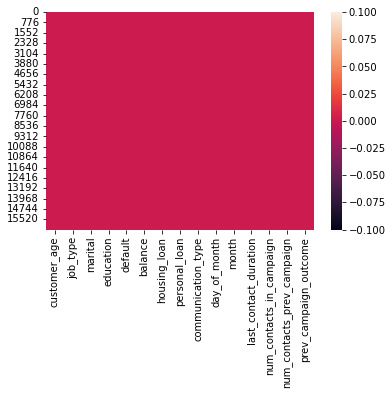

In [36]:
sns.heatmap(x_train.isnull())

&nbsp;

In [37]:
# Calling missing_rows again to check whether there is missing value or not.
missing_row(x_train)

There are total 0 missing rows. i.e 0.0


[]

In [38]:
x_train.isnull().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

- Now no rows with missing values.

## Skewness Detection and treatment.

#### Skewness
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed

In [39]:
x_train.describe(percentiles=[0.2,0.90,0.95,0.98,0.99])

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,40.338452,1382.981388,15.785197,854.910749,2.768612,0.581757
std,10.644681,3120.467985,8.289126,74.141229,3.105288,2.864201
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000
20%,31.000000,22.000000,7.000000,801.000000,1.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000
90%,55.000000,3622.100000,28.000000,934.000000,5.000000,2.000000
95%,59.000000,5870.050000,29.000000,991.000000,8.000000,3.000000
98%,62.000000,9772.680000,30.000000,997.000000,12.000000,6.000000
99%,70.000000,13542.890000,31.000000,998.000000,16.210000,8.000000


In [40]:
#Function to detect skewness in columns. this will return list of skewed columns.
def skew_detection(df):
    skew_colmns = []
    #checking skewness for each numeric columns.
    print('Skewness of each numeric columns.')
    print('')
    print(df.skew(axis=0,numeric_only=True))
    print('')
    print('')
    col = [i for i in df.columns if df[i].dtype =='float' or df[i].dtype == 'int64']
    print('Independent columns in which skewness > 0.5 and < -0.5 will be checked.')
    print('')
    print(col)
    print('')
    print('')
    # this will give list of skewed columns.
    print('Skewed column.')
    for i in col:
        if df[i].skew()>0.5 or df[i].skew()<-0.5:
            skew_colmns.append(i)
    print(skew_colmns)
    return skew_colmns
    

In [41]:
skew_col= skew_detection(x_train)

Skewness of each numeric columns.

customer_age                   0.647642
balance                        8.182217
day_of_month                   0.099777
last_contact_duration         -0.307985
num_contacts_in_campaign       4.871731
num_contacts_prev_campaign    56.253895
dtype: float64


Independent columns in which skewness > 0.5 and < -0.5 will be checked.

['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']


Skewed column.
['customer_age', 'balance', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']


In [42]:
# '''This function will take the data as argument  and treat the column which is skewed
# and the skewed columns is detected by skew_detection function'''
def skew_treatment(df,skewed_col):
    for col in skewed_col:
        fig, axes = plt.subplots(1, 2, figsize=(16,5))
        if col =='balance':
            axes[0].set_title('Before Transformation \n skewness of {} column is {}'.format(col,df[col].skew()))
            sns.histplot(df[col], kde=True, stat="density", linewidth=0,ax=axes[0])
            df[col] = np.log(df[col]+10000)
            axes[1].set_title('After Transformation \n skewness of {} column is {}'.format(col,df[col].skew()))
            sns.histplot(df[col], kde=True, stat="density", linewidth=0,ax=axes[1])
            plt.show()
        
        
        else:
            axes[0].set_title('Before Transformation \n skewness of {} column is {}'.format(col,df[col].skew()))
            sns.histplot(df[col], kde=True, stat="density", linewidth=0,ax=axes[0])
            df[col] = np.log(df[col]+1)
            axes[1].set_title('After Transformation \n skewness of {} column is {}'.format(col,df[col].skew()))
            sns.histplot(df[col], kde=True, stat="density", linewidth=0,ax=axes[1])
            plt.show()
            

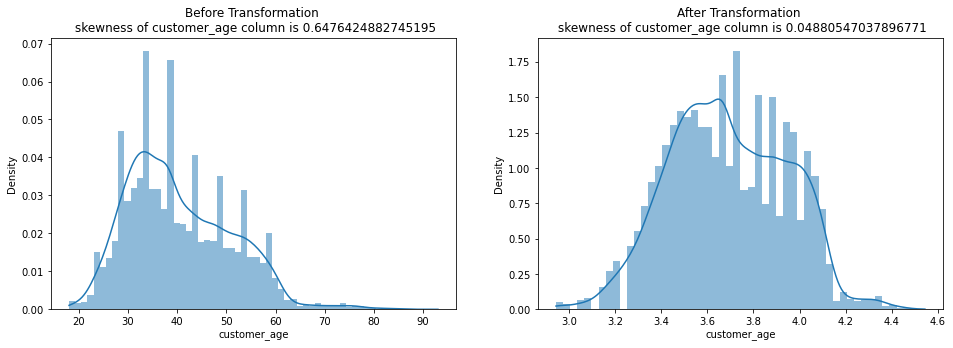

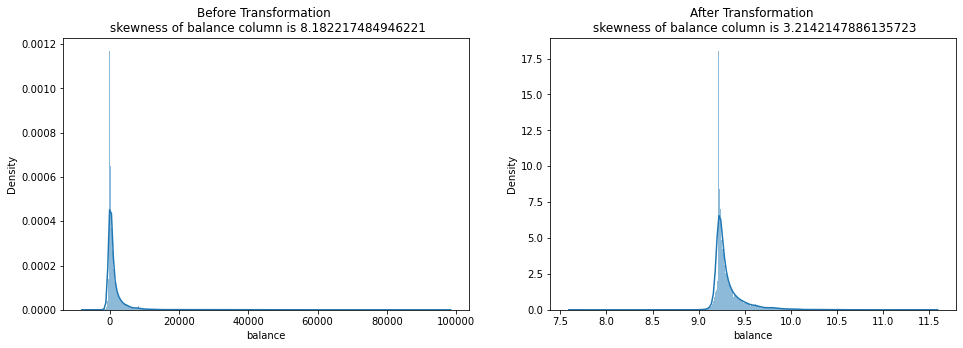

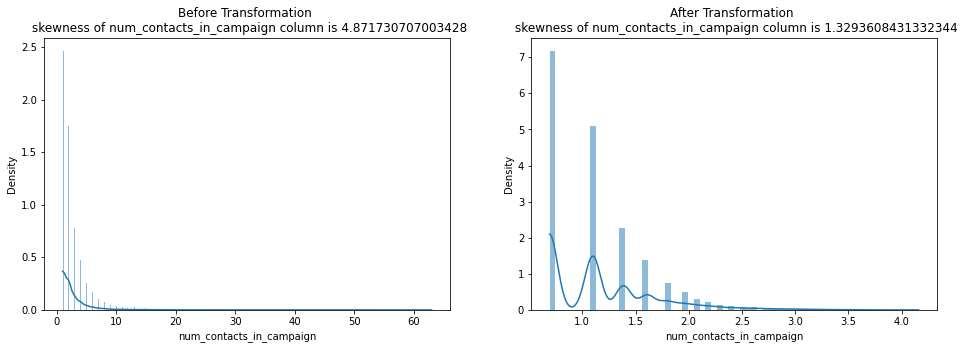

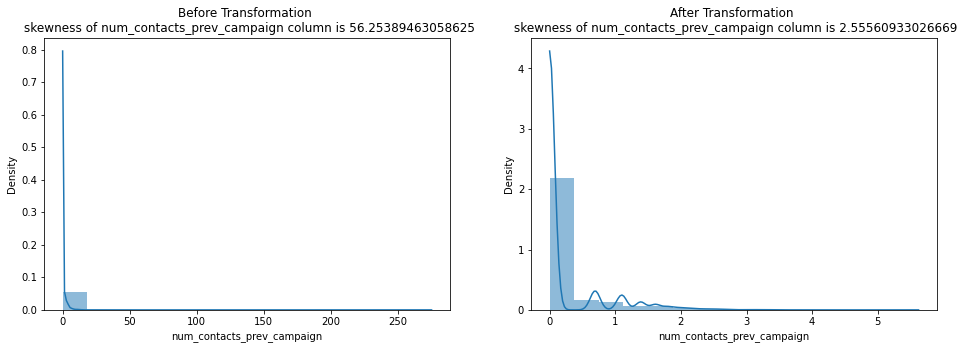

In [43]:
skew_treatment(x_train,skew_col)

### Outlier detection and treatment

In [44]:
x_train.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,3.689475,9.318978,15.785197,854.910749,1.158832,0.223910
std,0.254038,0.182507,8.289126,74.141229,0.513239,0.529973
min,2.944439,7.590852,1.000000,661.000000,0.693147,0.000000
25%,3.496508,9.217316,8.000000,809.000000,0.693147,0.000000
50%,3.663562,9.253687,16.000000,871.000000,1.098612,0.000000
75%,3.891820,9.343822,21.000000,895.000000,1.386294,0.000000
max,4.543295,11.593759,31.000000,1019.000000,4.158883,5.620401


In [45]:
columns = [i for i in x_train.columns if x_train[i].dtype =='float' or x_train[i].dtype == 'int64']
columns.remove('day_of_month')

In [46]:
def outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    Lower_bound = Q1-1.5*IQR
    Upper_bound = Q3+1.5*IQR
    
    outl_index = df.index[(df[feature]<Lower_bound) | (df[feature]>Upper_bound)]
    return outl_index
    

In [47]:
index_mul_colmn = []
for i in columns:
    index_mul_colmn.extend(outliers(x_train,i))

In [48]:
Sorted_lst = sorted(set(index_mul_colmn))

In [49]:
len(Sorted_lst)

4571

In [50]:
def Trans_outliers(df,feature):
    for col in feature:
        if col=='num_contacts_prev_campaign':
            P1 = np.percentile(df[col],2)
            P2 = np.percentile(df[col],99)
            df[col] = np.where((df[col]<P1) ,P1,df[col])
            df[col] = np.where((df[col]>P2) ,P2,df[col])
            
        else:    
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
    
            IQR = Q3 - Q1
    
            Lower_bound = Q1-1.5*IQR
            Upper_bound = Q3+1.5*IQR
    
            df[col] = np.where((df[col]<Lower_bound) ,Lower_bound,df[col])
            df[col] = np.where((df[col]>Upper_bound) ,Upper_bound,df[col])

In [51]:
Trans_outliers(x_train,columns)

In [52]:
x_train.describe(percentiles=[0.2,0.90,0.95,0.98,0.99])

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,3.689469,9.296742,15.785197,854.934705,1.148111,0.219390
std,0.254018,0.108128,8.289126,74.082610,0.478935,0.509092
min,2.944439,9.027557,1.000000,680.000000,0.693147,0.000000
20%,3.465736,9.212538,7.000000,801.000000,0.693147,0.000000
50%,3.663562,9.253687,16.000000,871.000000,1.098612,0.000000
90%,4.025352,9.519449,28.000000,934.000000,1.791759,1.098612
95%,4.094345,9.533580,29.000000,991.000000,2.197225,1.386294
98%,4.143135,9.533580,30.000000,997.000000,2.426015,1.945910
99%,4.262680,9.533580,31.000000,998.000000,2.426015,2.197225


&nbsp;

# Treating categorical variable.

In [53]:
x_train.shape

(16280, 15)

In [54]:
def Treat_categ_columns(ind_data):
    from sklearn.preprocessing import OneHotEncoder
    co = [i for i in ind_data.columns if ind_data[i].dtype=='O']
    ohe=OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)
    trans_data = ohe.fit_transform(ind_data[co]) #trans_data = transformed data after one hot encoding.
    encoded_df = pd.DataFrame(trans_data,columns =ohe.get_feature_names_out()) #encoded_df  = dataframe of transformed data 
    transformed = pd.concat([ind_data,encoded_df],axis=1)
    transformed.drop(co,axis =1,inplace=True)
    '''Transformed dataframe is the final dataframe after transforming category 
       to Num ,concating to previous dataframe and deleting categorical dataframe.''' 
    return transformed
    
    

In [55]:
xtreat_train = Treat_categ_columns(x_train)

In [56]:
xtreat_train.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,3.555348,9.236106,2,993.0,0.693147,0.693147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.828641,9.533580,14,892.0,2.197225,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.583519,9.485545,30,876.0,0.693147,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.871201,9.210340,14,800.0,2.197225,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.663562,9.395574,12,894.0,1.945910,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
xtreat_train.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
count,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,...,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,3.689469,9.296742,15.785197,854.934705,1.148111,0.219390,0.217199,0.033047,0.027887,0.209029,...,0.152211,0.118796,0.011486,0.307371,0.086916,0.016216,0.012899,0.038759,0.034705,0.819042
std,0.254018,0.108128,8.289126,74.082610,0.478935,0.509092,0.412352,0.178764,0.164654,0.406628,...,0.359237,0.323558,0.106561,0.461419,0.281721,0.126310,0.112843,0.193026,0.183038,0.384995
min,2.944439,9.027557,1.000000,680.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.496508,9.217316,8.000000,809.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.663562,9.253687,16.000000,871.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.891820,9.343822,21.000000,895.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.484789,9.533580,31.000000,1019.000000,2.426015,2.197225,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for Multicollinearity.

- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()
vif['Features']=xtreat_train.columns
vif['vif'] = [variance_inflation_factor(xtreat_train.values,i) for i in range(len(xtreat_train.columns))]

In [60]:
vif.sort_values("vif",ascending=False)

,Features,vif
1,balance,8155.814157
3,last_contact_duration,6951.385187
0,customer_age,345.213195
35,month_nov,40.726076
40,prev_campaign_outcome_unknown,37.973471
27,month_aug,21.835310
31,month_jul,14.318601
2,day_of_month,9.216733
34,month_may,8.829460
32,month_jun,8.001290


In [61]:
#droping Balance column as its vif is largest among all.
xtreat_train.drop('balance',axis=1,inplace=True)

In [62]:
#calculating vif score again 
vif1 = pd.DataFrame()
vif1['Features']=xtreat_train.columns
vif1['vif'] = [variance_inflation_factor(xtreat_train.values,i) for i in range(len(xtreat_train.columns))]

In [63]:
vif1.sort_values("vif",ascending=False)

,Features,vif
2,last_contact_duration,384.452769
0,customer_age,341.877803
39,prev_campaign_outcome_unknown,37.973453
3,num_contacts_in_campaign,7.785733
4,num_contacts_prev_campaign,7.501885
33,month_may,6.605724
1,day_of_month,6.172402
16,marital_married,6.171485
18,education_secondary,5.423372
19,education_tertiary,4.748289


In [64]:
#droping last contact duration column as its vif is largest among all.
xtreat_train.drop('last_contact_duration',axis=1,inplace=True)

In [65]:
#calculating vif score again 
vif2 = pd.DataFrame()
vif2['Features']=xtreat_train.columns
vif2['vif'] = [variance_inflation_factor(xtreat_train.values,i) for i in range(len(xtreat_train.columns))]

In [66]:
vif2.sort_values("vif",ascending=False)

,Features,vif
0,customer_age,65.321254
38,prev_campaign_outcome_unknown,35.073900
2,num_contacts_in_campaign,7.773618
3,num_contacts_prev_campaign,7.058265
32,month_may,6.602267
1,day_of_month,6.152198
15,marital_married,5.949976
17,education_secondary,5.138716
18,education_tertiary,4.537670
30,month_jun,3.884420


In [67]:
#droping customer age column as its vif is largest among all.
xtreat_train.drop('customer_age',axis=1,inplace=True)

In [68]:
#calculating vif score again 
vif3 = pd.DataFrame()
vif3['Features']=xtreat_train.columns
vif3['vif'] = [variance_inflation_factor(xtreat_train.values,i) for i in range(len(xtreat_train.columns))]

In [69]:
vif3.sort_values("vif",ascending=False)

,Features,vif
37,prev_campaign_outcome_unknown,22.456517
1,num_contacts_in_campaign,7.650087
31,month_may,6.059769
0,day_of_month,5.972503
14,marital_married,5.684477
2,num_contacts_prev_campaign,4.892204
16,education_secondary,4.825513
17,education_tertiary,4.412271
6,job_type_management,3.636483
29,month_jun,3.543593


In [70]:
#droping prev_campaign_outcome_unknown column as its vif is largest among all.
xtreat_train.drop('prev_campaign_outcome_unknown',axis=1,inplace=True)

In [71]:
#calculating vif score again 
vif4 = pd.DataFrame()
vif4['Features']=xtreat_train.columns
vif4['vif'] = [variance_inflation_factor(xtreat_train.values,i) for i in range(len(xtreat_train.columns))]

In [72]:
vif4.sort_values("vif",ascending=False)

,Features,vif
1,num_contacts_in_campaign,7.350545
0,day_of_month,5.750308
31,month_may,5.367949
14,marital_married,5.331416
16,education_secondary,4.459535
17,education_tertiary,4.244932
6,job_type_management,3.491755
23,communication_type_unknown,3.247847
29,month_jun,3.162010
15,marital_single,3.124012


- Four independent columns which are dependent on other independent columns and can be predicted or explained by others.
 - prev_campaign_outcome_unknown
 - customer_age
 - last_contact_duration
 - balance

So droping these four and proceed further with remaining column.

In [73]:
xtreat_train.head() #xtreat_train means this data set is final dataset after treatment.

,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success
0,2,0.693147,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,2.197225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30,0.693147,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,14,2.197225,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,1.945910,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Scaling independent features.

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scale = StandardScaler()

In [76]:
scaled_xtrain = scale.fit_transform(xtreat_train)

In [77]:
y_train.shape

(16280, 1)

In [78]:
scaled_xtrain.shape

(16280, 37)

&nbsp;

## treating test data 

#### Now we will check our model on test data. so will treat our raw test data for missing value, outliers, mulitcollinearity and convert categorical into numerical.

In [79]:
x_test.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
3077,33.0,technician,married,secondary,no,78.0,yes,no,cellular,25,aug,789,4.0,0,unknown
8764,40.0,management,married,tertiary,no,1778.0,yes,no,cellular,18,nov,704,4.0,0,unknown
21232,54.0,management,single,secondary,no,140.0,yes,no,unknown,4,jun,871,4.0,0,unknown
8716,33.0,entrepreneur,married,tertiary,no,2697.0,no,no,cellular,4,feb,991,3.0,0,unknown
420,23.0,technician,single,secondary,no,1868.0,no,no,cellular,2,aug,812,3.0,2,other


In [80]:
y_test.head()

,term_deposit_subscribed
3077,0
8764,0
21232,0
8716,0
420,0


In [81]:
# calculating percentage of missing values.
missing1 = x_test.isnull().sum().sort_values(ascending = False)
miss_per1 = (missing1 /len(x_test))*100

In [82]:
pd.DataFrame({'missing record':missing1,'Percentage of missing record':miss_per1.values})

,missing record,Percentage of missing record
customer_age,160,2.233389
balance,81,1.130653
personal_loan,30,0.418760
marital,22,0.307091
num_contacts_in_campaign,21,0.293132
job_type,0,0.000000
education,0,0.000000
default,0,0.000000
housing_loan,0,0.000000
communication_type,0,0.000000


<AxesSubplot:>

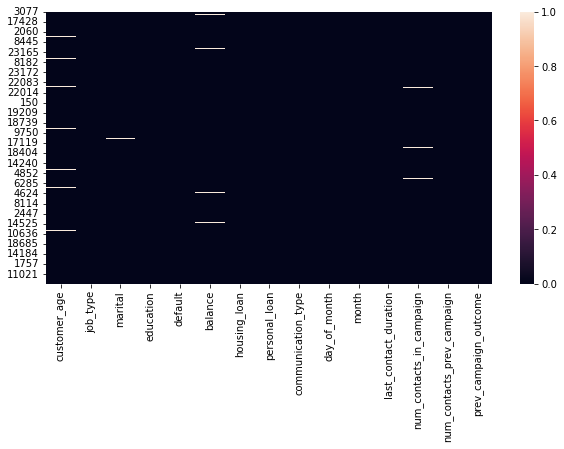

In [83]:
# Graphical representation of missing values.
plt.figure(figsize =(10,5))
sns.heatmap(x_test.isnull())

In [84]:
#Applying age function.
x_test['customer_age'] = x_test[['customer_age','job_type']].apply(age,axis = 1)

<AxesSubplot:>

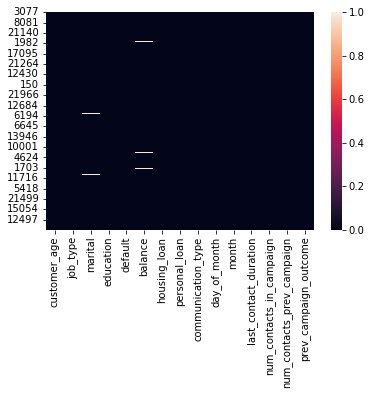

In [85]:
sns.heatmap(x_test.isnull())

In [86]:
indexes = missing_row(x_test) #This will give the list of index of rows which are missing.

There are total 153 missing rows. i.e 2.135678391959799


In [87]:
x_test = x_test.dropna()
x_test = x_test.reset_index(drop = True)
y_test = y_test.drop(indexes)
y_test = y_test.reset_index(drop = True)

<AxesSubplot:>

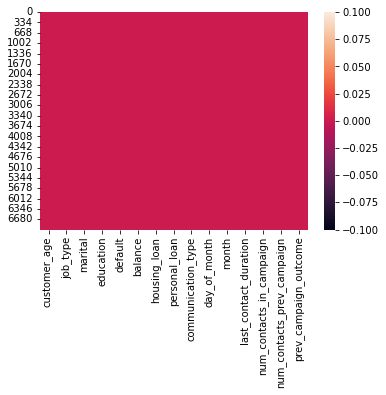

In [88]:
sns.heatmap(x_test.isnull())

In [89]:
# Calling missing_rows again to check whether there is missing value or not.
missing_row(x_test)

There are total 0 missing rows. i.e 0.0


[]

In [90]:
skew_col_test= skew_detection(x_test)

Skewness of each numeric columns.

customer_age                  0.728710
balance                       6.132108
day_of_month                  0.092969
last_contact_duration        -0.290210
num_contacts_in_campaign      5.141809
num_contacts_prev_campaign    9.317566
dtype: float64


Independent columns in which skewness > 0.5 and < -0.5 will be checked.

['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']


Skewed column.
['customer_age', 'balance', 'num_contacts_in_campaign', 'num_contacts_prev_campaign']


In [91]:
skew_col_test

['customer_age',
 'balance',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign']

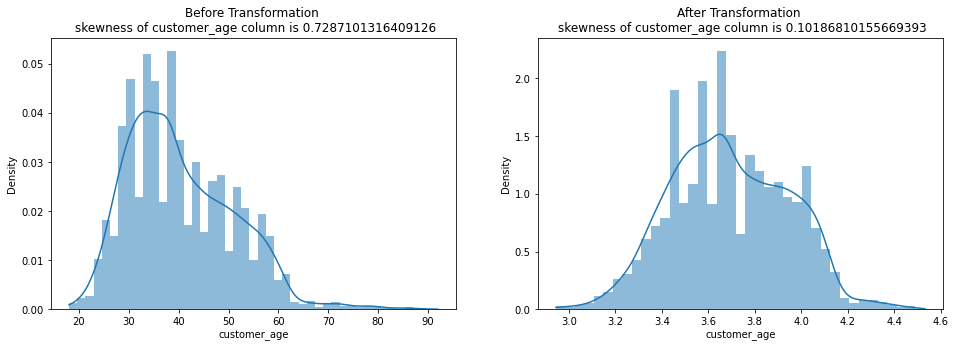

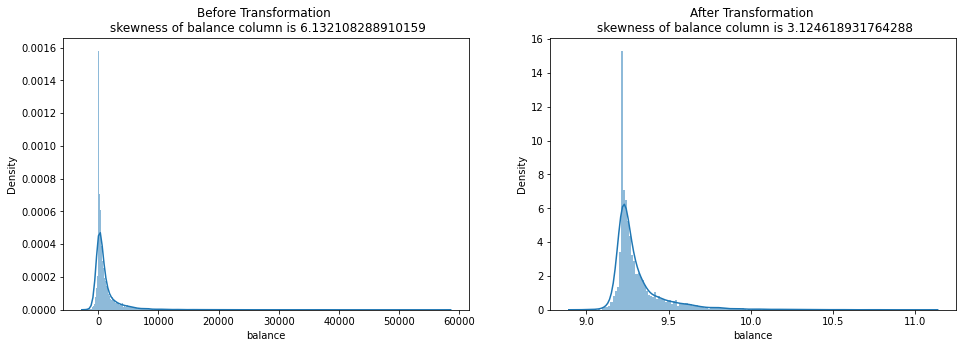

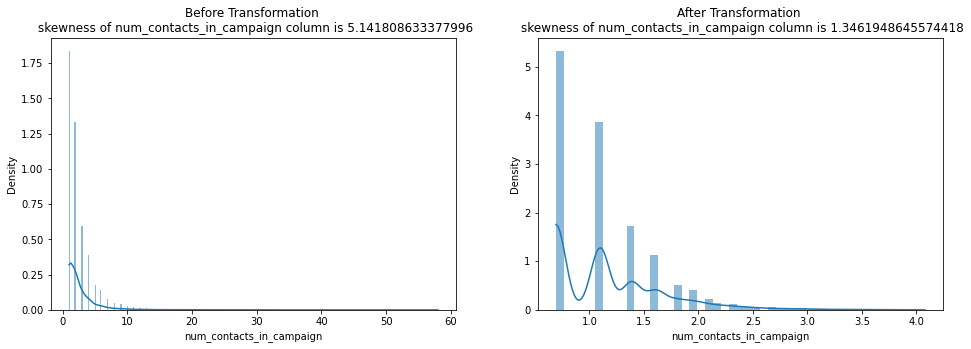

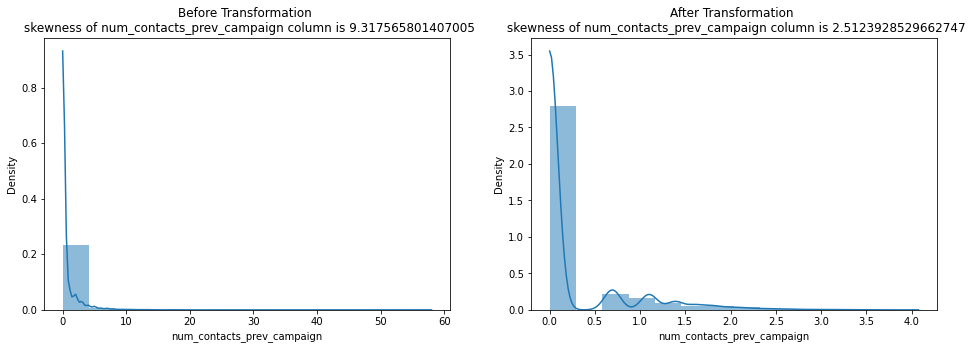

In [92]:
skew_treatment(x_test,skew_col_test)

In [93]:
columns1 = [i for i in x_test.columns if x_test[i].dtype =='float' or x_test[i].dtype == 'int64']
columns1.remove('day_of_month')

In [94]:
index_mul_colmn1 = []
for i in columns1:
    index_mul_colmn1.extend(outliers(x_test,i))

In [95]:
Sorted_lst1 = sorted(set(index_mul_colmn1))

In [96]:
len(Sorted_lst1)

2026

In [97]:
Trans_outliers(x_test,columns1)

In [98]:
xtreat_test = Treat_categ_columns(x_test)

In [99]:
xtreat_test.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,3.526361,9.218110,25,789.0,1.609438,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.713572,9.373989,18,704.0,1.609438,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4.007333,9.224243,4,871.0,1.609438,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.526361,9.449121,4,991.0,1.386294,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.178054,9.381601,2,812.0,1.386294,1.098612,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
vif_ = pd.DataFrame()
vif_['Features']=xtreat_test.columns
vif_['vif'] = [variance_inflation_factor(xtreat_test.values,i) for i in range(len(xtreat_test.columns))]

In [101]:
vif_.sort_values("vif",ascending=False)

,Features,vif
1,balance,8704.616662
3,last_contact_duration,7507.686334
0,customer_age,359.436390
35,month_nov,46.268578
40,prev_campaign_outcome_unknown,35.381424
27,month_aug,23.814161
31,month_jul,15.021743
2,day_of_month,9.645118
34,month_may,9.046907
32,month_jun,8.272328


In [102]:
#droping Balance column as its vif is largest among all.
xtreat_test.drop('balance',axis=1,inplace=True)

In [103]:
#calculating vif score again 
vif1_ = pd.DataFrame()
vif1_['Features']=xtreat_test.columns
vif1_['vif'] = [variance_inflation_factor(xtreat_test.values,i) for i in range(len(xtreat_test.columns))]

In [104]:
vif1_.sort_values("vif",ascending=False)

,Features,vif
2,last_contact_duration,400.252466
0,customer_age,357.415551
39,prev_campaign_outcome_unknown,35.374023
3,num_contacts_in_campaign,7.964394
4,num_contacts_prev_campaign,7.101730
33,month_may,6.734237
16,marital_married,6.421311
1,day_of_month,6.217319
18,education_secondary,5.381372
19,education_tertiary,4.761119


In [105]:
#droping last contact duration column as its vif is largest among all.
xtreat_test.drop('last_contact_duration',axis=1,inplace=True)

In [106]:
#calculating vif score again 
vif2_ = pd.DataFrame()
vif2_['Features']=xtreat_test.columns
vif2_['vif'] = [variance_inflation_factor(xtreat_test.values,i) for i in range(len(xtreat_test.columns))]

In [107]:
vif2_.sort_values("vif",ascending=False)

,Features,vif
0,customer_age,64.711708
38,prev_campaign_outcome_unknown,32.314106
2,num_contacts_in_campaign,7.951908
32,month_may,6.733790
3,num_contacts_prev_campaign,6.658029
1,day_of_month,6.201456
15,marital_married,6.146870
17,education_secondary,5.100975
18,education_tertiary,4.557472
30,month_jun,3.820143


In [108]:
#droping customer age column as its vif is largest among all.
xtreat_test.drop('customer_age',axis=1,inplace=True)

In [109]:
#calculating vif score again 
vif3_ = pd.DataFrame()
vif3_['Features']=xtreat_test.columns
vif3_['vif'] = [variance_inflation_factor(xtreat_test.values,i) for i in range(len(xtreat_test.columns))]

In [110]:
vif3_.sort_values("vif",ascending=False)

,Features,vif
37,prev_campaign_outcome_unknown,20.858804
1,num_contacts_in_campaign,7.823436
0,day_of_month,6.005091
31,month_may,5.989276
14,marital_married,5.891542
16,education_secondary,4.798494
2,num_contacts_prev_campaign,4.692494
17,education_tertiary,4.423597
6,job_type_management,3.639815
15,marital_single,3.414880


In [111]:
#droping prev_campaign_outcome_unknown column as its vif is largest among all.
xtreat_test.drop('prev_campaign_outcome_unknown',axis=1,inplace=True)

In [112]:
#calculating vif score again 
vif4_ = pd.DataFrame()
vif4_['Features']=xtreat_test.columns
vif4_['vif'] = [variance_inflation_factor(xtreat_test.values,i) for i in range(len(xtreat_test.columns))]

In [113]:
vif4_.sort_values("vif",ascending=False)

,Features,vif
1,num_contacts_in_campaign,7.437493
0,day_of_month,5.846664
14,marital_married,5.518546
31,month_may,5.454877
16,education_secondary,4.459119
17,education_tertiary,4.245641
6,job_type_management,3.533925
23,communication_type_unknown,3.342262
15,marital_single,3.238612
20,housing_loan_yes,3.150114


- Four independent columns which are dependent on other independent columns and can be predicted or explained by others.
 - prev_campaign_outcome_unknown
 - customer_age
 - last_contact_duration
 - balance

So droping these four and proceed further with remaining column.

In [114]:
xtreat_test.head() #xtreat_test means this data set is final dataset after treatment.

,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success
0,25,1.609438,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18,1.609438,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4,1.609438,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.386294,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1.386294,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Scaling test data.

In [115]:
scaled_xtest = scale.transform(xtreat_test)

## Modeling Section

In [116]:
import statsmodels.api as sm

In [117]:
log_reg = sm.Logit(y_train , scaled_xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.639529
         Iterations 7


In [118]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     term_deposit_subscribed   No. Observations:                16280
Model:                               Logit   Df Residuals:                    16243
Method:                                MLE   Df Model:                           36
Date:                     Sat, 03 Sep 2022   Pseudo R-squ.:                 -0.8813
Time:                             13:06:17   Log-Likelihood:                -10412.
converged:                            True   LL-Null:                       -5534.2
Covariance Type:                 nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0476      0.019      2.466      0.014       0.010       0.085
x2            -0.0686      0.018     -3.885      0.000      -0.103      -0.034
x3            -0.0182      0.022     -0.838      0.402      -0.061       0.024
x4             0.0044      0.026      0.168      0.867      -0.047       0.056
x5             0.0009      0.019      0.046      0.963      -0.036       0.038
x6            -0.0110      0.019     -0.585      0.559      -0.048       0.026
x7             0.0056      0.029      0.196      0.845      -0.051       0.062
x8             0.0553      0.020      2.743      0.006       0.016       0.095
x9             0.0249      0.019      1.313      0.189      -0.012       0.062
x10            0.0179      0.021      0.842      0.400      -0.024       0.059
x11            0.0503      0.019      2.647      0.008       0.013       0.088
x12            0.0040      0.024      0.167      0.868      -0.043       0.051
x13            0.0164      0.018      0.891      0.373      -0.020       0.052
x14            0.0020      0.017      0.115      0.909      -0.032       0.036
x15           -0.0195      0.026     -0.758      0.449      -0.070       0.031
x16            0.0289      0.026      1.111      0.267      -0.022       0.080
x17            0.0159      0.026      0.601      0.548      -0.036       0.068
x18            0.0380      0.030      1.267      0.205      -0.021       0.097
x19           -0.0049      0.019     -0.260      0.795      -0.042       0.032
x20            0.0052      0.016      0.320      0.749      -0.027       0.037
x21           -0.1088      0.020     -5.552      0.000      -0.147      -0.070
x22           -0.0400      0.017     -2.371      0.018      -0.073      -0.007
x23           -0.0028      0.017     -0.165      0.869      -0.036       0.031
x24           -0.1596      0.025     -6.381      0.000      -0.209      -0.111
x25           -0.1274      0.029     -4.460      0.000      -0.183      -0.071
x26            0.0549      0.020      2.738      0.006       0.016       0.094
x27           -0.0229      0.023     -1.009      0.313      -0.067       0.022
x28           -0.0865      0.020     -4.295      0.000      -0.126      -0.047
x29           -0.1128      0.028     -4.012      0.000      -0.168      -0.058
x30            0.0145      0.031      0.475      0.635      -0.045       0.074
x31            0.1519      0.022      6.774      0.000       0.108       0.196
x32           -0.0630      0.035     -1.796      0.072      -0.132       0.006
x33           -0.0968      0.024     -4.062      0.000      -0.144      -0.050
x34            0.0889      0.020      4.337      0.000       0.049       0.129
x35            0.1153      0.022      5.220      0.000       0.072       0.159
x36            0.0304      0.018      1.654      0.098      -0.006       0.066
x37            1.8082      0.087     20.733      0.000       1.637       1.979
====================================

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logst = LogisticRegression(penalty='l1', solver ='liblinear')

In [121]:
logst.fit(scaled_xtrain,y_train.values.ravel())

LogisticRegression(penalty='l1', solver='liblinear')

In [122]:
print(logst.coef_)

[[ 0.10766191 -0.23016365 -0.0052099  -0.02367381  0.         -0.03677337
   0.00757007  0.1121962   0.05685253  0.04054627  0.06353443 -0.00122428
   0.03744861  0.01229638 -0.06468876  0.07410685  0.05800168  0.0966099
  -0.0090401   0.01961716 -0.3035426  -0.15291777 -0.00087106 -0.60075185
  -0.27987702  0.0460572  -0.04863205 -0.20330346 -0.26813096  0.1066104
   0.13628934 -0.17098793 -0.22683359  0.07803659  0.09765179  0.06471789
   0.46004568]]


In [123]:
ytrain_predicted = logst.predict(scaled_xtrain)

In [124]:
ytest_predicted = logst.predict(scaled_xtest)

In [125]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

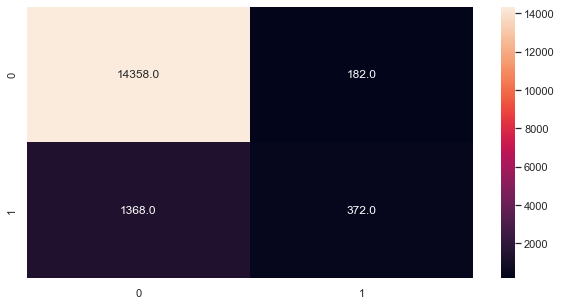

In [126]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(confusion_matrix(y_train,ytrain_predicted), annot = True,fmt =".1f")

<AxesSubplot:>

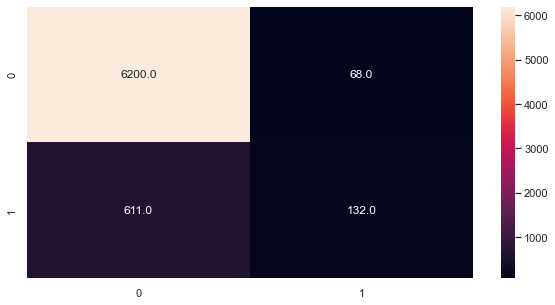

In [127]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(confusion_matrix(y_test,ytest_predicted), annot = True,fmt =".1f")

In [128]:
# classification report on train data.
print(classification_report(y_train,ytrain_predicted))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     14540
           1       0.67      0.21      0.32      1740

    accuracy                           0.90     16280
   macro avg       0.79      0.60      0.64     16280
weighted avg       0.89      0.90      0.88     16280



In [129]:
# classification report on test data.
print(classification_report(y_test,ytest_predicted))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6268
           1       0.66      0.18      0.28       743

    accuracy                           0.90      7011
   macro avg       0.79      0.58      0.61      7011
weighted avg       0.88      0.90      0.88      7011



&nbsp;

<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

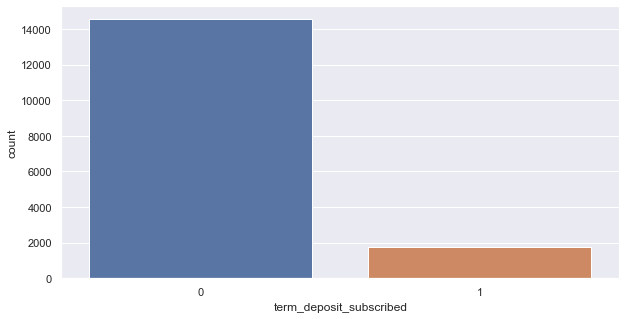

In [130]:
sns.countplot(x='term_deposit_subscribed',data=y_train)

In [131]:
y_train.value_counts()

term_deposit_subscribed
0                          14540
1                           1740
dtype: int64

# Performing smote on the imbalnced training dataset
- we should not use imbalanced dataset for training because it may happen that model get baised toward majority class.<br> And it can be seen above that recall for majority class is 99% and for minority class recall is just 21%.

  __- 89% are 0 and 11% are 1__
  <br>
- Will balanced this dataset by oversampling minority class i.e creating synthetic data , it works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
sm =SMOTE(random_state =42)

In [134]:
bal_x_train,bal_y_train =sm.fit_resample(scaled_xtrain,y_train)

In [135]:
pd.DataFrame(bal_y_train).value_counts()

term_deposit_subscribed
0                          14540
1                          14540
dtype: int64

- __After performing smote, now the classes are in equall proportion__

In [136]:
#Using l1 as penalty to eliminate features which are not significant.
sm_logistic = LogisticRegression(penalty='l2',solver ='liblinear')

In [137]:
sm_logistic.fit(bal_x_train,bal_y_train.values.ravel()) # flattening a 2d numpy array into 1d array using ravel()


LogisticRegression(solver='liblinear')

In [138]:
ytrain_pre = sm_logistic.predict(bal_x_train)

In [139]:
ytest_pre = sm_logistic.predict(scaled_xtest)

In [140]:
#classification report on train data.
print(classification_report(bal_y_train,ytrain_pre))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     14540
           1       0.76      0.66      0.70     14540

    accuracy                           0.72     29080
   macro avg       0.73      0.72      0.72     29080
weighted avg       0.73      0.72      0.72     29080



In [141]:
#classification report on test data.
print(classification_report(y_test,ytest_pre))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      6268
           1       0.26      0.61      0.37       743

    accuracy                           0.78      7011
   macro avg       0.61      0.71      0.62      7011
weighted avg       0.87      0.78      0.81      7011



# Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

### Random forest with default parameter.

In [143]:
rf = RandomForestClassifier(random_state=99, oob_score=True)

In [144]:
rf.fit(bal_x_train,bal_y_train.values.ravel())

RandomForestClassifier(oob_score=True, random_state=99)

In [145]:
# target prediction on training data.
rf_ytrain_pred = rf.predict(bal_x_train)

# target prediction on test data.
rf_ytest_pred = rf.predict(scaled_xtest)

In [146]:
# classification report on training data.
print(classification_report(bal_y_train,rf_ytrain_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14540
           1       1.00      0.99      0.99     14540

    accuracy                           0.99     29080
   macro avg       0.99      0.99      0.99     29080
weighted avg       0.99      0.99      0.99     29080



In [147]:
# classification report on testing data.
print(classification_report(y_test,rf_ytest_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6268
           1       0.45      0.31      0.36       743

    accuracy                           0.89      7011
   macro avg       0.69      0.63      0.65      7011
weighted avg       0.87      0.89      0.88      7011



In [148]:
# out of bag score.
rf.oob_score_

0.9350756533700137

In [149]:
# visualization of 50th tree.
ped = rf.estimators_[51]

In [150]:
# from sklearn import tree
# plt.figure(figsize =(15,10))
# tree.plot_tree(ped,filled = True)
# plt.show()

&nbsp;

## Parameter optimization of Random forest.

In [151]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [152]:
parameter = {'max_depth':[10,11,12,13,14,15],'max_leaf_nodes':[50,52,53,54,55,57,60,],'min_samples_split':[20,22,24,25,26,27,30,32,35],'min_samples_leaf':[5,7,9,10,12,14,16]}

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
rnd_search = RandomizedSearchCV(RandomForestClassifier(), parameter, n_iter =60, cv=9,verbose=20,n_jobs=-1,scoring='f1')

In [154]:
rnd_search.fit(bal_x_train,bal_y_train.values.ravel())

Fitting 9 folds for each of 60 candidates, totalling 540 fits


RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 11, 12, 13, 14, 15],
                                        'max_leaf_nodes': [50, 52, 53, 54, 55,
                                                           57, 60],
                                        'min_samples_leaf': [5, 7, 9, 10, 12,
                                                             14, 16],
                                        'min_samples_split': [20, 22, 24, 25,
                                                              26, 27, 30, 32,
                                                              35]},
                   scoring='f1', verbose=20)

In [155]:
# Best parameter combinations out of all possible combination.
rnd_search.best_params_

{'min_samples_split': 30,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 60,
 'max_depth': 15}

In [156]:
rnd_search.best_score_

0.8339188366300655

In [157]:
rnd_search.scorer_

make_scorer(f1_score, average=binary)

### Random forest with optimized parameter.

In [158]:
optimized_rf = RandomForestClassifier(max_depth=11, max_leaf_nodes =60, min_samples_leaf = 5, min_samples_split =24 )

In [159]:
optimized_rf.fit(bal_x_train,bal_y_train.values.ravel()) 

RandomForestClassifier(max_depth=11, max_leaf_nodes=60, min_samples_leaf=5,
                       min_samples_split=24)

In [160]:
#Targer prediction on training data.
optimized_rf_ytrain_pred = optimized_rf.predict(bal_x_train)

# target prediction on test data.
optimized_rf_ytest_pred = optimized_rf.predict(scaled_xtest)

In [161]:
# classification report on training data.
print(classification_report(bal_y_train,optimized_rf_ytrain_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     14540
           1       0.88      0.81      0.84     14540

    accuracy                           0.85     29080
   macro avg       0.85      0.85      0.85     29080
weighted avg       0.85      0.85      0.85     29080



In [162]:
# classification report on testing data.
print(classification_report(y_test,optimized_rf_ytest_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      6268
           1       0.35      0.51      0.41       743

    accuracy                           0.85      7011
   macro avg       0.64      0.70      0.66      7011
weighted avg       0.88      0.85      0.86      7011



In [163]:
# # visualization of 50th tree.
# rf_ped = optimized_rf.estimators_[51]
# plt.figure(figsize =(15,10))
# tree.plot_tree(rf_ped,filled = True)
# plt.show()

In [164]:
prob = optimized_rf.predict_proba(scaled_xtest)